In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import joblib
from sklearn.model_selection import train_test_split

In [15]:
s2_path = "../WESAD/S2/S2.pkl"


with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')


pecho_ace_x = s2_data['signal']['chest']['ACC'][0:,0] # ACELERACION
pecho_ace_y = s2_data['signal']['chest']['ACC'][0:,1]
pecho_ace_z = s2_data['signal']['chest']['ACC'][0:,2]

pecho_ecg = s2_data['signal']['chest']['ECG'][:,0]  # MIDE ACTIVIDAD ELECTRICA DEL CORAZON
pecho_eda = s2_data['signal']['chest']['EDA'][:,0]  # MIDE CONDUCTANCIA PIEL
pecho_emg = s2_data['signal']['chest']['EMG'][:,0]  # MIDE ACTIVIDAD MUSCULAR
pecho_temp= s2_data['signal']['chest']['Temp'][:,0] # TEMPERATURA
pecho_resp= s2_data['signal']['chest']['Resp'][:,0] # RESPIRACION

label= s2_data['label']



In [19]:
pecho_ace_x.shape, pecho_ace_y.shape, pecho_ace_z.shape, pecho_ecg.shape

((4255300,), (4255300,), (4255300,), (4255300,))

In [20]:


s3_path = "../WESAD/S3/S3.pkl"

with open(s3_path, 'rb') as file:
    s3_data = pickle.load(file, encoding='latin1')

pecho_ace_x = np.append(pecho_ace_x,s3_data['signal']['chest']['ACC'][0:,0]) # ACELERACION
pecho_ace_y = np.append(pecho_ace_y,s3_data['signal']['chest']['ACC'][0:,1])
pecho_ace_z = np.append(pecho_ace_z,s3_data['signal']['chest']['ACC'][0:,2])

pecho_ecg = np.append(pecho_ecg,s3_data['signal']['chest']['ECG'][:,0])  # MIDE ACTIVIDAD ELECTRICA DEL CORAZON
pecho_eda = np.append(pecho_eda,s3_data['signal']['chest']['EDA'][:,0])  # MIDE CONDUCTANCIA PIEL
pecho_emg = np.append(pecho_emg,s3_data['signal']['chest']['EMG'][:,0])  # MIDE ACTIVIDAD MUSCULAR
pecho_temp= np.append(pecho_temp,s3_data['signal']['chest']['Temp'][:,0]) # TEMPERATURA
pecho_resp= np.append(pecho_resp,s3_data['signal']['chest']['Resp'][:,0]) # RESPIRACION



label= np.append(label,s3_data['label'])


In [21]:
pecho_ace_x.shape, pecho_ace_y.shape, pecho_ace_z.shape, pecho_ecg.shape

((8800400,), (8800400,), (8800400,), (8800400,))

In [22]:

numpy_data=np.array([pecho_ace_x,
                     pecho_ace_y,
                     pecho_ace_z,
                     pecho_ecg,
                     pecho_eda,
                     pecho_emg,
                     pecho_temp,
                     pecho_resp,
                     label])

numpy_data=numpy_data.T

df_dataset = pd.DataFrame(data=numpy_data, columns=["pecho_ax", "pecho_ay", "pecho_az","pecho_ecg","pecho_eda","pecho_emg","pecho_temp","pecho_resp","label"]) 

df_dataset.describe()

,pecho_ax,pecho_ay,pecho_az,pecho_ecg,pecho_eda,pecho_emg,pecho_temp,pecho_resp,label
count,8.800400e+06,8.800400e+06,8.800400e+06,8.800400e+06,8.800400e+06,8.800400e+06,8.800400e+06,8.800400e+06,8.800400e+06
mean,8.080442e-01,-6.386879e-02,-1.874883e-01,9.959463e-04,4.594854e+00,-2.938807e-03,3.174066e+01,5.443802e-02,1.214683e+00
std,1.430417e-01,9.496279e-02,3.823490e-01,2.382159e-01,3.167064e+00,2.808942e-02,1.639905e+00,3.503312e+00,1.623865e+00
min,-6.600000e+00,-6.600000e+00,-6.600000e+00,-1.500000e+00,0.000000e+00,-1.500000e+00,-2.731500e+02,-5.000000e+01,0.000000e+00
25%,8.126000e-01,-1.262000e-01,-4.002000e-01,-1.147614e-01,1.176453e+00,-1.057434e-02,3.118405e+01,-1.702881e+00,0.000000e+00
50%,8.606000e-01,-6.099999e-02,-2.060000e-01,-9.567261e-03,6.554794e+00,-2.288818e-03,3.188623e+01,-1.846313e-01,0.000000e+00
75%,8.990000e-01,-3.400028e-03,5.620003e-02,3.959656e-02,7.323837e+00,5.035400e-03,3.282480e+01,1.879883e+00,2.000000e+00
max,2.981400e+00,1.322400e+00,4.508200e+00,1.499954e+00,1.636543e+01,1.464340e+00,3.452197e+01,2.737885e+01,7.000000e+00


LA DATA DE CADA SENSOR YA ESTA CONVERTIDO DE ADC A SEÑAL MEDIBLE

array([[<AxesSubplot:title={'center':'pecho_ax'}>,
        <AxesSubplot:title={'center':'pecho_ay'}>,
        <AxesSubplot:title={'center':'pecho_az'}>],
       [<AxesSubplot:title={'center':'pecho_ecg'}>,
        <AxesSubplot:title={'center':'pecho_eda'}>,
        <AxesSubplot:title={'center':'pecho_emg'}>],
       [<AxesSubplot:title={'center':'pecho_temp'}>,
        <AxesSubplot:title={'center':'pecho_resp'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

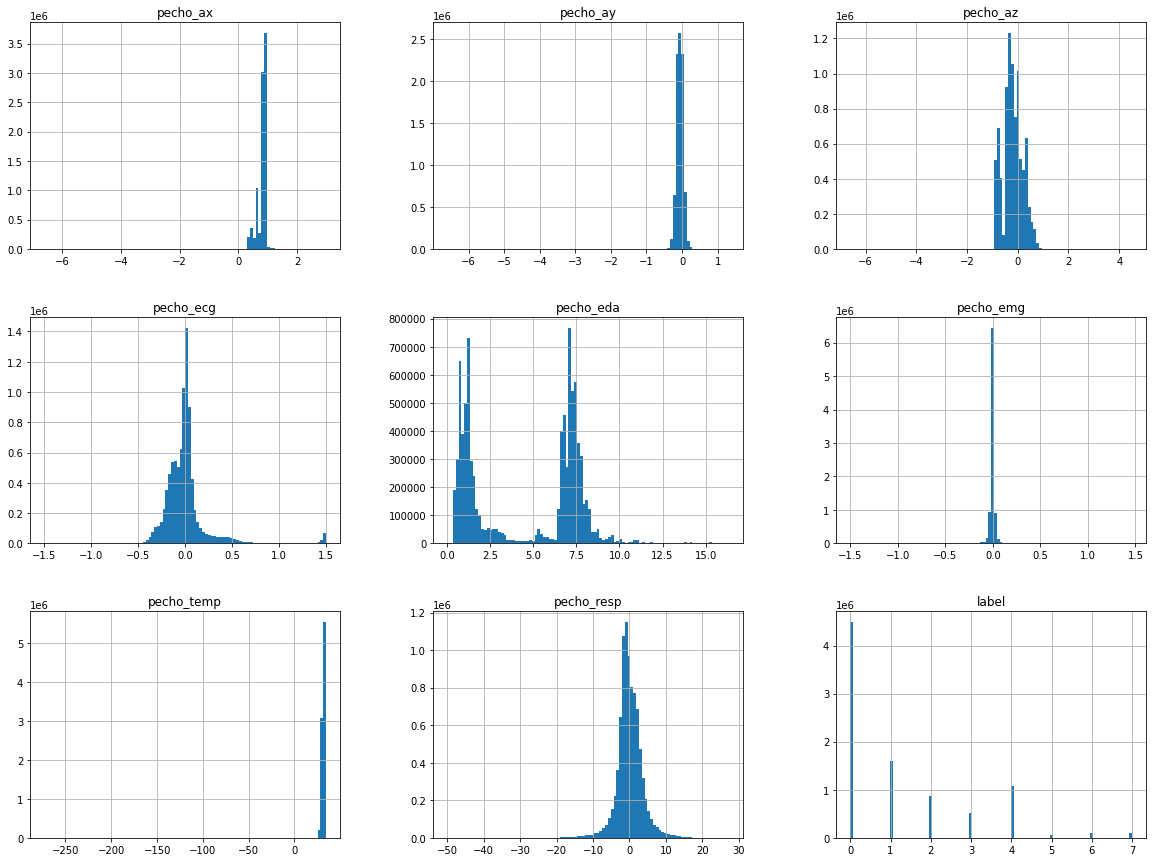

In [23]:

df_dataset.hist(bins=100,layout=(3,3), figsize = (20,15))

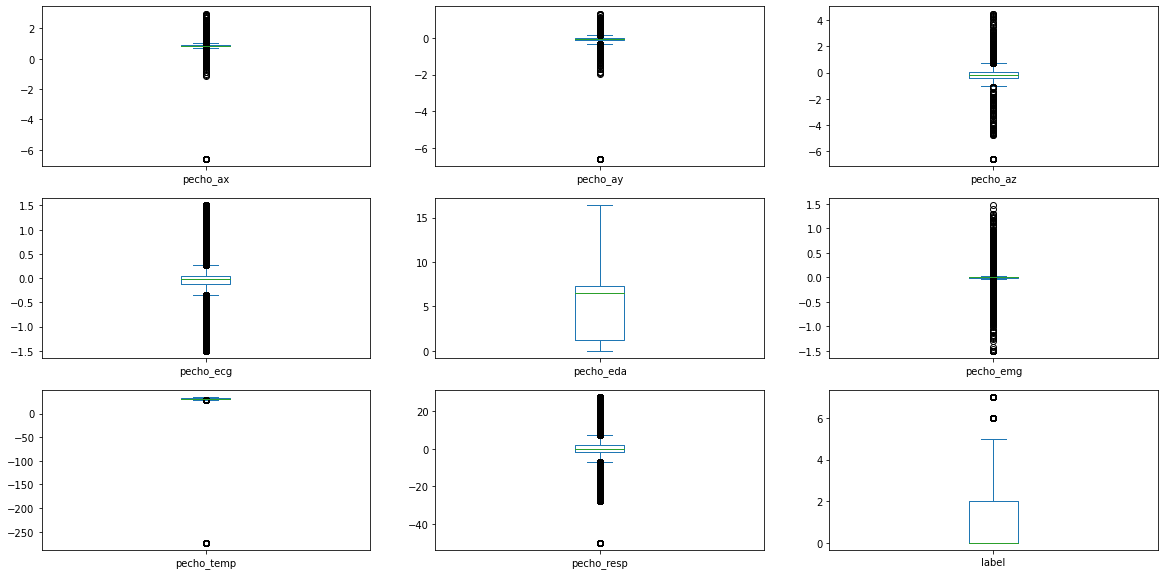

In [24]:
df_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False ,figsize=(20,10))
plt.show()

In [25]:
# calculo de outliers
Q1 = df_dataset.quantile(0.25)
Q3 = df_dataset.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)

# eliminar outliers
df_out = df_dataset[~((df_dataset < (Q1 - 1.5 * IQR)) |(df_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_out.describe())

IQR is
 pecho_ax      0.086400
pecho_ay      0.122800
pecho_az      0.456400
pecho_ecg     0.154358
pecho_eda     6.147385
pecho_emg     0.015610
pecho_temp    1.640747
pecho_resp    3.582764
label         2.000000
dtype: float64
           pecho_ax      pecho_ay      pecho_az     pecho_ecg     pecho_eda  \
count  5.169660e+06  5.169660e+06  5.169660e+06  5.169660e+06  5.169660e+06   
mean   8.713939e-01 -5.619540e-02 -1.195410e-01 -4.321093e-02  4.908769e+00   
std    4.033626e-02  8.011808e-02  2.588626e-01  1.099914e-01  3.087822e+00   
min    6.830000e-01 -3.104000e-01 -1.021400e+00 -3.462982e-01  2.784729e-01   
25%    8.446000e-01 -1.246000e-01 -3.272000e-01 -1.157684e-01  1.226425e+00   
50%    8.782001e-01 -5.140001e-02 -1.812000e-01 -2.114868e-02  6.653976e+00   
75%    9.026000e-01 -1.399994e-03  2.499998e-02  2.352905e-02  7.360077e+00   
max    1.028600e+00  1.808000e-01  7.408000e-01  2.711334e-01  1.633759e+01   

          pecho_emg    pecho_temp    pecho_resp         la

array([[<AxesSubplot:title={'center':'pecho_ax'}>,
        <AxesSubplot:title={'center':'pecho_ay'}>,
        <AxesSubplot:title={'center':'pecho_az'}>],
       [<AxesSubplot:title={'center':'pecho_ecg'}>,
        <AxesSubplot:title={'center':'pecho_eda'}>,
        <AxesSubplot:title={'center':'pecho_emg'}>],
       [<AxesSubplot:title={'center':'pecho_temp'}>,
        <AxesSubplot:title={'center':'pecho_resp'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

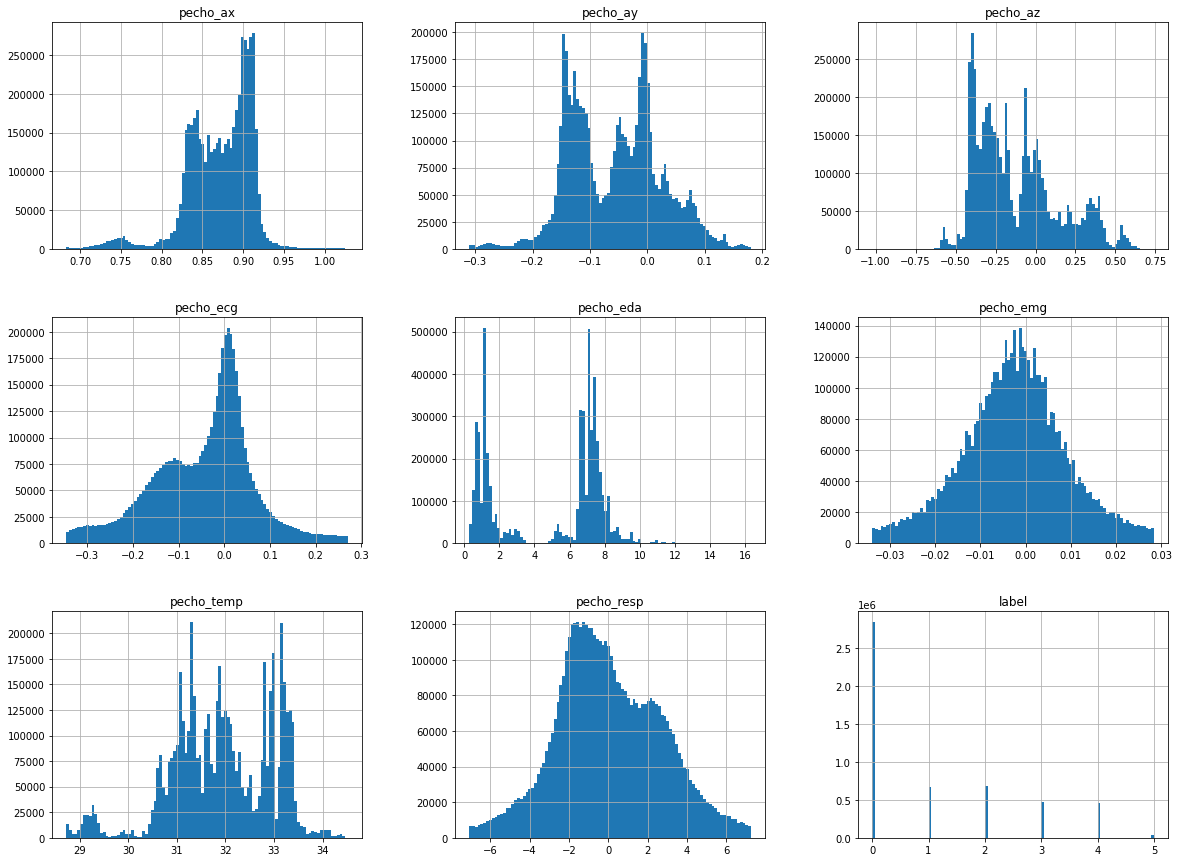

In [26]:
df_out.hist(bins=100, figsize = (20,15))

60% TOTAL --> ENTRENAMIENTO
40% TOTAL --> TEST

In [27]:
X_out = df_out.iloc[:,0:8].values
Y_out = df_out.iloc[:,8].values

x_train, x_test, y_train, y_test = train_test_split(X_out,Y_out,test_size=0.4, random_state=0)

x_train.shape,x_test.shape,y_train.shape, y_test.shape

((4135728, 8), (1033932, 8), (4135728,), (1033932,))

In [28]:
corr_matrix = df_out.corr()
corr_matrix

,pecho_ax,pecho_ay,pecho_az,pecho_ecg,pecho_eda,pecho_emg,pecho_temp,pecho_resp,label
pecho_ax,1.000000,0.123499,0.087220,0.036475,-0.077688,0.002948,0.104613,-0.027686,0.219184
pecho_ay,0.123499,1.000000,0.323166,-0.157502,0.730472,-0.026088,0.569803,-0.005053,0.130113
pecho_az,0.087220,0.323166,1.000000,-0.076419,0.327612,0.005459,0.499528,-0.030223,-0.173795
pecho_ecg,0.036475,-0.157502,-0.076419,1.000000,-0.193623,0.004851,-0.121734,0.007977,-0.036801
pecho_eda,-0.077688,0.730472,0.327612,-0.193623,1.000000,-0.030163,0.465083,0.008004,0.207425
pecho_emg,0.002948,-0.026088,0.005459,0.004851,-0.030163,1.000000,-0.017006,-0.000298,-0.021636
pecho_temp,0.104613,0.569803,0.499528,-0.121734,0.465083,-0.017006,1.000000,0.008574,0.332768
pecho_resp,-0.027686,-0.005053,-0.030223,0.007977,0.008004,-0.000298,0.008574,1.000000,0.008734
label,0.219184,0.130113,-0.173795,-0.036801,0.207425,-0.021636,0.332768,0.008734,1.000000


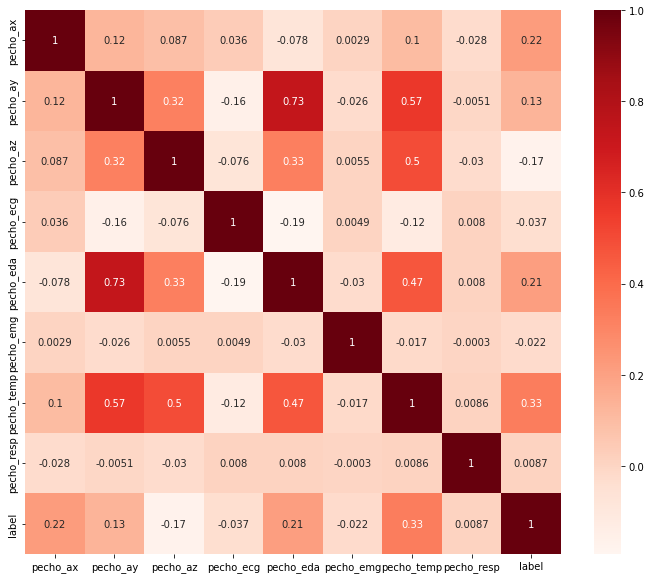

In [29]:

plt.figure(figsize=(12,10))
cor = df_out.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

         0.0     0.9378    0.7174    0.8129    568700
         1.0     0.9195    0.9575    0.9381    133924
         2.0     0.5183    0.8343    0.6394    136170
         3.0     0.6471    0.9236    0.7610     94853
         4.0     0.9583    0.9933    0.9755     91994
         5.0     0.8687    0.9911    0.9259      8291

    accuracy                         0.8096   1033932
   macro avg     0.8083    0.9029    0.8421   1033932
weighted avg     0.8548    0.8096    0.8169   1033932



In [31]:
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica  
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 
from sklearn.svm import SVC   # para modelos SVM
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion 

# Definimos el pool de algoritmos de ML a evaluar
algoritmos = []
algoritmos.append(('LR', LogisticRegression(solver='liblinear')))  #genera logistic regresors con solver liblinear
algoritmos.append(('KNN', KNeighborsClassifier(n_neighbors=5))) #genera knn con 5 vecinos
algoritmos.append(('CART', DecisionTreeClassifier(max_depth=None))) # genera DT sin restriccion de profundidad

In [32]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []


seed = 666   
kfold = KFold(n_splits=3, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo de ML
for algoname, algo in algoritmos:
    cv_results = cross_val_score(algo, x_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

In [1]:
# Muestra graficamente los resultados de balanced_accuracy  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en x-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: name 'plt' is not defined

In [3]:
print('jo')

jo
